In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time
import psutil
import humanize
import os

Using TensorFlow backend.


In [0]:
dados_um = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', delimiter=',')
dados_dois = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', delimiter=',')
dados_três = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', delimiter=',')


In [0]:
dados_um_ajust = dados_um[~np.isnan(dados_um).any(axis=1)].astype(int)

x = (dados_um[:,1:10])
y = dados_um[:,10]
y = (y-2)/2


In [0]:
def treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2):
  
  model = Sequential()
  model.add(Dense(n_saida_cam_1, input_dim=9))
  model.add(Activation(func_ativ_1))
  model.add(Dense(n_saida_cam_2))
  model.add(Activation(func_ativ_2))
  sgd = optimizers.SGD(lr=taxa_aprend)

  model.compile(optimizer='sgd', loss='mse', metrics=['acc'])
 
  process = psutil.Process(os.getpid())
 

  memory1= process.memory_info().rss
  time1 = time.time()

  resultado = model.fit(x, y, epochs=epocas, batch_size=tam_batch, verbose=0)
  
  #teste = model.evaluate(x_test, y_test, batch_size=tam_batch, verbose=1)
  #print ('isto é', teste)
  
  memory2=process.memory_info().rss
  time2 = time.time()

  
 # val_acc=resultado.history['val_acc'][-1]
  mem = memory2 - memory1
  temp = time2 - time1
 #acuracia.append(val_acc)
  tempo_de_processamento.append(temp)
  uso_de_memoria.append(mem)
  #print('\nacurácia: ', val_acc)
  print('uso de memória: ',humanize.naturalsize(mem))
  print('tempo de processamento: ', temp)
   
  plt.subplot(1, 2, 1)
  plt.plot(resultado.history['loss'])
  #plt.plot(resultado.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  

  plt.subplot(1, 2, 2)
  plt.plot(resultado.history['acc'])
  #plt.plot(resultado.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
 
  plt.tight_layout()
  plt.show()




 Treinamento para batch size:  2
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
uso de memória:  22.0 MB
tempo de processamento:  24.559364557266235


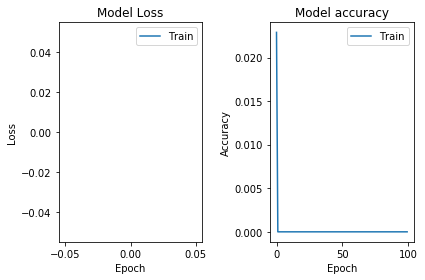


 Treinamento para batch size:  10
uso de memória:  4.1 MB
tempo de processamento:  6.088716268539429


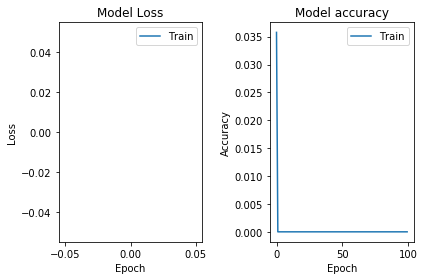

In [0]:
tempo_de_processamento = []
uso_de_memoria = []
acuracia = []

epocas = 100
tam_batch = 2
taxa_aprend = 0.001
func_ativ_1 = 'sigmoid'
func_ativ_2 = 'sigmoid'
n_saida_cam_1 = 10
n_saida_cam_2 = 1

print('\n Treinamento para batch size: ', tam_batch)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

tam_batch = 10
print('\n Treinamento para batch size: ', tam_batch)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

tam_batch = 100
print('\n Treinamento para batch size: ', tam_batch)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

tam_batch = 250
print('\n Treinamento para batch size: ', tam_batch)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

tam_batch = 500
print('\n Treinamento para batch size: ', tam_batch)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

In [0]:
a=np.arange(5)     
print(tempo_de_processamento)
plt.bar(a,height=tempo_de_processamento, align='center')
plt.xticks(a, (2,10,100,250,500))
plt.title('Tempo de Processamento X Batch Size')
plt.ylabel('Tempo de Processamento')
plt.xlabel('Batch Size do Treinamento')
plt.show() 

print(uso_de_memoria)

plt.bar(a,height=uso_de_memoria, align='center')
plt.xticks(a, (2,10,100,250,500))
plt.title('Uso de Memória X Batch Size')
plt.ylabel('Uso de Memória')
plt.xlabel('Batch Size do Treinamento')
plt.show() 

print(acuracia)
plt.bar(a,height=acuracia, align='center')
plt.xticks(a, (2,10,100,250,500))
plt.title('Acurácia X Batch Size')
plt.ylabel('Acurácia')
plt.xlabel('Batch Size do Treinamento')
plt.show() 
       

In [0]:
tempo_de_processamento = []
uso_de_memoria = []
acuracia = []


tam_batch = 100

print('\n Treinamento para taxa de aprendizado: ', taxa_aprend)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

taxa_aprend = 0.01
print('\n Treinamento para taxa de aprendizado: ', taxa_aprend)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

taxa_aprend = 0.1
print('\n Treinamento para taxa de aprendizado: ', taxa_aprend)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

taxa_aprend = 1
print('\n Treinamento para taxa de aprendizado: ', taxa_aprend)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)

taxa_aprend = 10
print('\n Treinamento para taxa de aprendizado: ', taxa_aprend)
treinamento_modelo(epocas, tam_batch, taxa_aprend, func_ativ_1, func_ativ_2,n_saida_cam_1,n_saida_cam_2)




In [0]:
a=np.arange(5)     
print(tempo_de_processamento)
plt.bar(a,height=tempo_de_processamento, align='center')
plt.xticks(a, (0.001,0.01,0.1,1,10))
plt.title('Tempo de Processamento X Taxa de Aprendizado')
plt.ylabel('Tempo de Processamento')
plt.xlabel('Taxa de Aprendizado')
plt.show() 

print(uso_de_memoria)

plt.bar(a,height=uso_de_memoria, align='center')
plt.xticks(a, (0.001,0.01,0.1,1,10))
plt.title('Uso de Memória X Taxa de Aprendizado')
plt.ylabel('Uso de Memória')
plt.xlabel('Taxa de Aprendizado')
plt.show() 


print(acuracia)
plt.bar(a,height=acuracia, align='center')
plt.xticks(a, (0.001,0.01,0.1,1,10))
plt.title('Acurácia X Taxa de Aprendizado')
plt.ylabel('Acurácia Processamento')
plt.xlabel('Taxa de Aprendizado')
plt.show() 

       